<a href="https://colab.research.google.com/github/a1ire3a/frequency-domain-filter/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compare Ideal & Gaussian filter**

In [ ]:
import numpy as np
import cv2
import urllib.request as url
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from google.colab.patches import cv2_imshow

load library

In [ ]:
req = url.urlopen("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)

load lena image

In [ ]:
def lpi(img,rd):
    radius = rd
    mask = np.zeros_like(img)
    cy = mask.shape[0] // 2
    cx = mask.shape[1] // 2
    lpideal = cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)
    return lpideal

create low pass ideal filter contain circle in middle with deffrent radius

In [ ]:
def filtering(img,filter):
    img_dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(img_dft)
    dft_shift = np.multiply(dft_shift,filter)/255
    idft_shift = np.fft.ifftshift(dft_shift)
    ifimg = np.fft.ifft2(idft_shift)
    ifimg = np.abs(ifimg)
    cv2_imshow(ifimg)

function for filtering image and show it

**Result:**

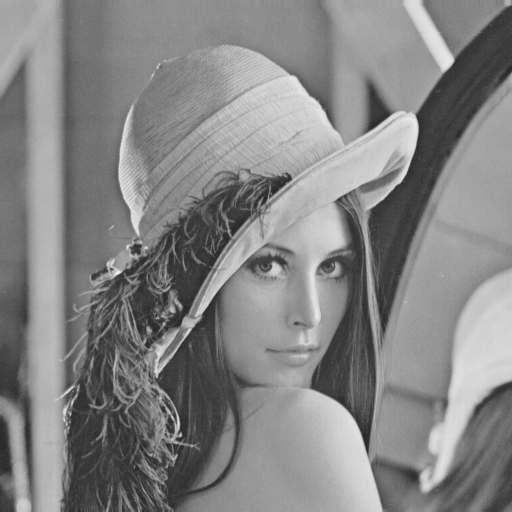

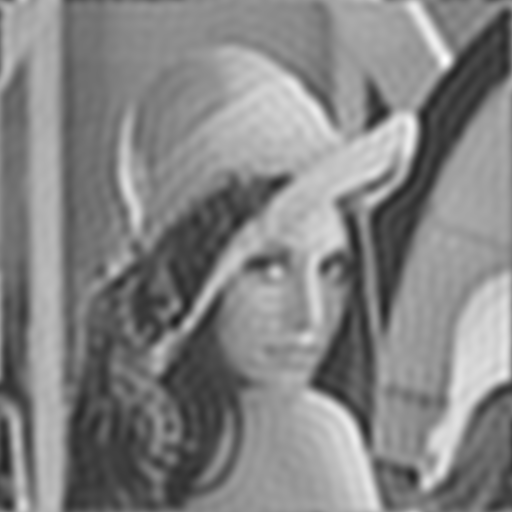

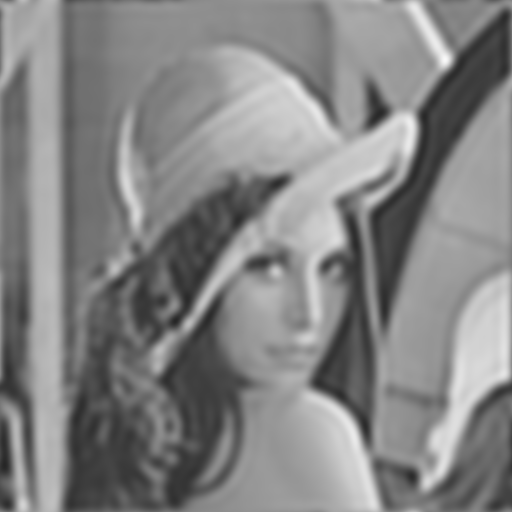

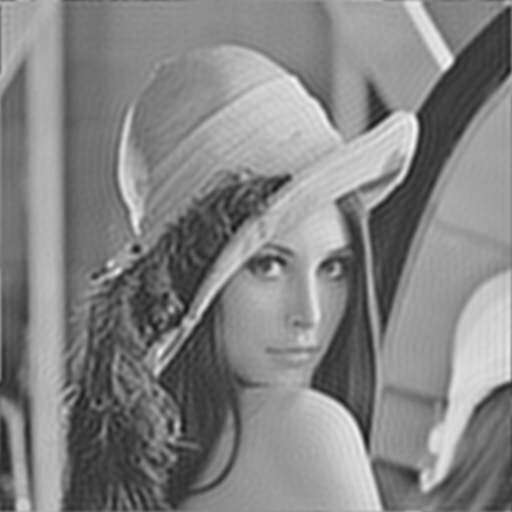

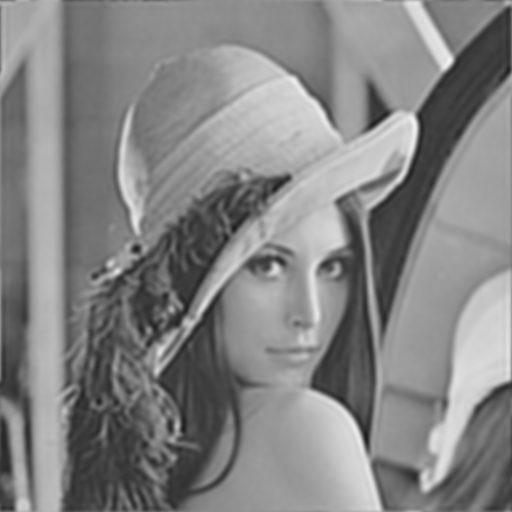

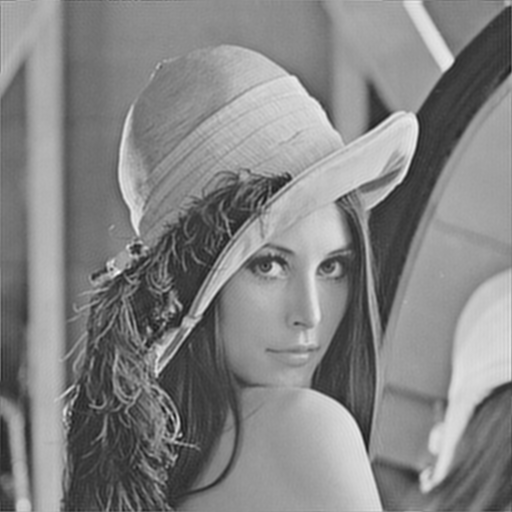

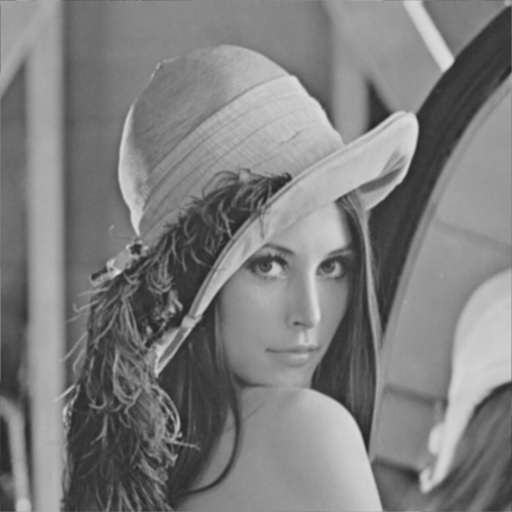

In [ ]:
arr = []

lpi1 = lpi(img,32)
g1 = gaussian_filter(lpi1, sigma=5)

lpi2 = lpi(img,64)
g2 = gaussian_filter(lpi2, sigma=10)
lpi3 = lpi(img,128)
g3 = gaussian_filter(lpi3, sigma=50)

cv2_imshow(img)
arr.append(filtering(img,lpi1))
arr.append(filtering(img,g1))
arr.append(filtering(img,lpi2))
arr.append(filtering(img,g2))
arr.append(filtering(img,lpi3))
arr.append(filtering(img,g3))

the 1st image is original image

2nd image is filtered image with low pass ideal filter with radius equal 32

3d image is filteres image with low pass gaussian filter with rasius equal 32 and gaussian sigma equal 5

4th image is filtered image with low pass ideal filter with radius equal 64

5th image is filteres image with low pass gaussian filter with rasius equal 64 and gaussian sigma equal 10

6th image is filtered image with low pass ideal filter with radius equal 128

7th image is filteres image with low pass gaussian filter with rasius equal 128 and gaussian sigma equal 50

as shown, ideal filtered images are ringing effect but gaussian filtered images are blured without that effect. this effect more showable in detail of image that passed a lower frequency